In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import cv2

(225, 350, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


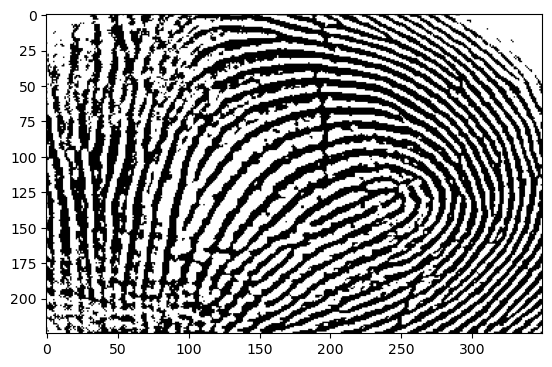

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0 255 255 ... 255 255 255]
 [255   0 255 ... 255 255 255]
 [255 255 255 ... 255 255   0]]
[[0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


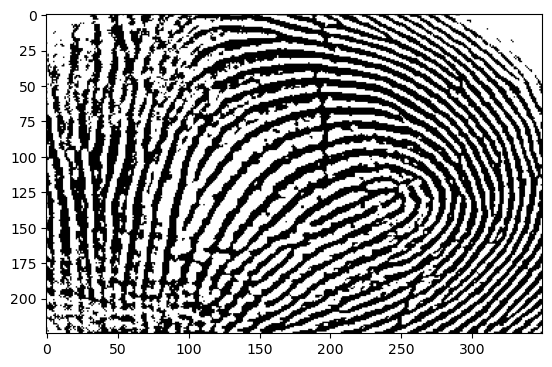

In [3]:
contact_image_raw = cv2.imread('/home/skully/Acads/ee678-wavelets/final_project_testing/PolyU/amt_contactless_2d_fingerprint_images/first_session/p1/p1.bmp')
print(np.shape(contact_image_raw))
print(contact_image_raw[:3,:3])
contact_image_gray = cv2.cvtColor(contact_image_raw, cv2.COLOR_BGR2GRAY)
normalized_img = cv2.normalize(contact_image_gray, None, 0, 1, cv2.NORM_MINMAX)
# plt.imshow(image_raw)
plt.imshow(contact_image_gray, cmap='gray')
plt.show()
plt.imshow(normalized_img,cmap='gray')

np.shape(contact_image_gray)
print(contact_image_gray)
print(normalized_img[200:210, 150:160])

In [4]:


# Define transformations: resize, grayscale, and normalize
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Force single grayscale channel
    transforms.ToTensor(),                         # Convert to tensor
])

# Load dataset using ImageFolder
data_dir = '/home/skully/Acads/ee678-wavelets/final_project_testing/PolyU/amt_contactless_2d_fingerprint_images/first_session'  # Path to the common directory containing all p1, p2, etc., subfolders
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
image_tensor, label = dataset[0]
print(image_tensor)
print(np.shape(image_tensor))
print(image_tensor.shape)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define data loaders for training and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Check the class mapping
print("Class mapping:", dataset.class_to_idx)


tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [0., 1., 1.,  ..., 1., 1., 1.],
         [1., 0., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 0.]]])
torch.Size([1, 225, 350])
torch.Size([1, 225, 350])
Class mapping: {'p1': 0, 'p10': 1, 'p100': 2, 'p101': 3, 'p102': 4, 'p103': 5, 'p104': 6, 'p105': 7, 'p106': 8, 'p107': 9, 'p108': 10, 'p109': 11, 'p11': 12, 'p110': 13, 'p111': 14, 'p112': 15, 'p113': 16, 'p114': 17, 'p115': 18, 'p116': 19, 'p117': 20, 'p118': 21, 'p119': 22, 'p12': 23, 'p120': 24, 'p121': 25, 'p122': 26, 'p123': 27, 'p124': 28, 'p125': 29, 'p126': 30, 'p127': 31, 'p128': 32, 'p129': 33, 'p13': 34, 'p130': 35, 'p131': 36, 'p132': 37, 'p133': 38, 'p134': 39, 'p135': 40, 'p136': 41, 'p137': 42, 'p138': 43, 'p139': 44, 'p14': 45, 'p140': 46, 'p141': 47, 'p142': 48, 'p143': 49, 'p144': 50, 'p145': 51, 'p146': 52, 'p147': 53, 'p148': 54, 'p149': 55, 'p15': 56, 'p15

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

num_classes = 336
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)    # Input: 1 channel, Output: 16 channels
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        
        # Adjust the size of the fully connected layer (fc1) based on the new feature map size
        self.fc1 = nn.Linear(34943, 32)  # Reduced fully connected layer size
        self.fc2 = nn.Linear(32, num_classes)   # Output layer
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Apply convolution and pooling layers
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        
        # print("Shape after conv layers:", x.shape)  # Debug: Check intermediate shape
        
        # Flatten the tensor to match the input size of fc1
        x = x.view(x.size(0), -1)                 # Automatically infer the flatten size
        # print("Shape after flattening:", x.shape)  # Debug: Check flattened shape
        
        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Example usage with random input
model = MyModel()
dummy_input = torch.randn(1, 1, 225, 350)  # Assuming single-channel 225x350 image
model(dummy_input)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x34944 and 34943x32)

In [12]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Instantiate the model
model = MyModel()

# Get the number of trainable parameters
num_params = count_parameters(model)
print(f'Number of trainable parameters: {num_params}')

Number of trainable parameters: 1135216


In [7]:
# # Example training loop
# model = MyModel()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# epochs = 1
# for epoch in range(epochs):  # Set a desired number of epochs
#     for images, labels in train_loader:  # Define train_loader with your data
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#     print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [9]:
# Move the model to GPU if available
model = MyModel().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Example training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        # Move images and labels to the same device as model
        images, labels = images.to(device), labels.to(device)
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 5.8262
Epoch [2/10], Loss: 5.7882
Epoch [3/10], Loss: 5.8797
Epoch [4/10], Loss: 5.8048
Epoch [5/10], Loss: 5.8381
Epoch [6/10], Loss: 5.8283
Epoch [7/10], Loss: 5.8340
Epoch [8/10], Loss: 5.8331
Epoch [9/10], Loss: 5.7802
Epoch [10/10], Loss: 5.8567


In [10]:
# Set the model to evaluation mode after training
model.eval()

# Initialize variables to track the validation accuracy
correct = 0
total = 0

# No need to track gradients during evaluation, so use torch.no_grad()
with torch.no_grad():
    for images, labels in val_loader:
        # print(labels == 301)
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get the predicted class (index of the max logit)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        # Update the number of correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy}%')

tensor([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52],
       device='cuda:0')
tensor([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52],
       device='cuda:0')
tensor([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52],
       device='cuda:0')
tensor([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52],
       device='cuda:0')
tensor([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52],
       device='cuda:0')
tensor([52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52],
       dev

In [11]:
torch.tensor([0.12, 0.32]).cuda()

tensor([0.1200, 0.3200], device='cuda:0')